<a href="https://colab.research.google.com/github/mgczacki/iap/blob/main/libretas/Tarea1-Ej1y2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Perceptrón y Redes Densas

### Notebook 1 de 3

#### Autor: Mario Horacio Garrido Czacki

Resuelve los siguientes ejercicios en libretas de Colab independientes que sean replicables.

#### 1. Un perceptrón o neurona no es capaz de aproximar una función que separe en dos clases (naranja y azul) el conjunto de datos mostrado en la figura 1. Propón una transformación aplicada a los atributos x1 y x2 de forma que puedan ser separados por solo un perceptrón. Justifica porque la transformación propuesta funciona. (2 puntos.)

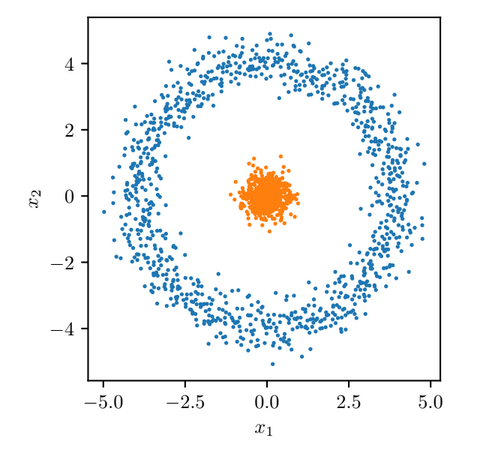
<center>Figura 1: Conjunto de datos no separable linealmente.</center>

Es claro que se puede trazar un círculo para dividir los dos conjuntos perfectamente. Lo que quede dentro del círculo puede verse como parte del conjunto naranja y lo que quede fuera como parte del conjunto azul.

Dado que el círculo centrado en el origen puede ser definido solamente por el tamaño del radio, podemos entonces proponer la transformación $x_1^2 + x_2^2$ como una transformación que vuelve al conjunto linealmente separable. Si se ajusta un umbral de decisión, es equivalente a generar el círculo propuesto previamente con un cierto radio igual a la raíz del umbral de decisión propuesto.

Se puede utilizar $x_1^2 + x_2^2$ en vez de la distancia al origen, $\sqrt{x_1^2 + x_2^2}$ debido a que la función raíz, en este contexto, solo agrega tiempo de procesamiento y es monótona.

#### 2. Extiende el ejercicio `1c_reglin.ipynb` visto en clase para realizar regresión lineal con los dos atributos de entrada. (2 puntos.)


<center>Nota: Únicamente puedes hacer uso de tensores.</center>

## 1 Preparación

### 1.1 Bibliotecas

In [1]:
# sistema de archivos
import os

# gráficas
import matplotlib.pyplot as plt
# csv
import pandas as pd
# redes neuronales
import torch

### 1.2 Auxiliares

In [2]:
URL = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
base_dir = '../datos'
filename = 'califs.csv'
filepath = os.path.join(base_dir, filename)

## 2 Datos

Descargamos los datos

In [3]:
! mkdir {base_dir}
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘../datos’: File exists
File ‘../datos/califs.csv’ already there; not retrieving.


Utilizamos para la lectura del csv e imprimimos los primeros 5 ejemplos.

In [7]:
df = pd.read_csv(filepath, header = None)
df.columns = ['prev', 'horas', 'calif']
df.head(5)

,prev,horas,calif
0,5.638,8.289,5.136
1,6.744,9.389,5.931
2,5.136,10.060,5.484
3,5.748,10.421,6.524
4,7.136,10.434,6.770


Obtengamos los atributos y la salida:

In [16]:
x = torch.tensor(df.iloc[:, :2].values)
x = x.view(-1, 2).type(torch.float32)
print(x.shape)
x[:5]

torch.Size([50, 2])


tensor([[ 5.6380,  8.2890],
        [ 6.7440,  9.3890],
        [ 5.1360, 10.0600],
        [ 5.7480, 10.4210],
        [ 7.1360, 10.4340]])

In [17]:
y_true = torch.tensor(df.iloc[:, 2].values)
y_true = y_true.view(-1, 1).type(torch.float32)
print(y_true.shape)
y_true[:5]

torch.Size([50, 1])


tensor([[5.1360],
        [5.9310],
        [5.4840],
        [6.5240],
        [6.7700]])

In [18]:
# número de ejemplos y atributos
m, d = x.shape
m, d

(50, 2)

In [23]:
%matplotlib inline
import numpy as np

from mpl_toolkits import mplot3d

In [29]:
x.numpy()

array([[ 5.638,  8.289],
       [ 6.744,  9.389],
       [ 5.136, 10.06 ],
       [ 5.748, 10.421],
       [ 7.136, 10.434],
       [ 6.489, 10.437],
       [ 6.148, 10.46 ],
       [ 6.834, 10.518],
       [ 6.381, 10.768],
       [ 6.274, 10.948],
       [ 4.968, 10.964],
       [ 5.642, 11.207],
       [ 5.977, 11.366],
       [ 7.155, 11.508],
       [ 6.258, 11.525],
       [ 7.093, 11.539],
       [ 5.434, 11.555],
       [ 7.002, 11.596],
       [ 6.462, 11.611],
       [ 4.25 , 11.784],
       [ 8.015, 11.864],
       [ 6.744, 11.896],
       [ 5.474, 11.915],
       [ 7.517, 11.937],
       [ 5.767, 11.949],
       [ 5.538, 11.971],
       [ 7.555, 12.026],
       [ 7.055, 12.111],
       [ 6.126, 12.164],
       [ 7.1  , 12.276],
       [ 5.526, 12.524],
       [ 7.997, 12.803],
       [ 6.052, 12.807],
       [ 7.172, 12.814],
       [ 5.477, 12.818],
       [ 7.796, 12.865],
       [ 8.074, 12.943],
       [ 5.995, 12.961],
       [ 8.477, 13.026],
       [ 7.336, 13.12 ],


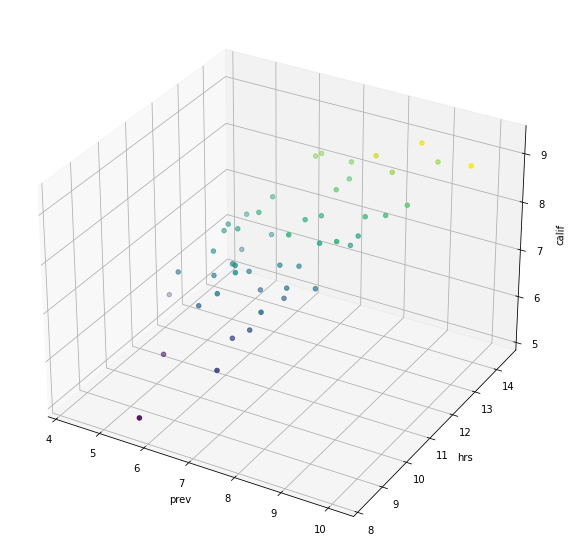

In [39]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

ax.scatter3D(x.numpy()[:,0], x.numpy()[:,1], y_true.view(-1).numpy(), c = y_true.view(-1).numpy())
ax.set_xlabel('prev')
ax.set_ylabel('hrs')
ax.set_zlabel('calif')
plt.show()

## 3. Hipótesis

Recordemos que dado un conjunto de ejemplos con atributos ($x_1, \dots, x_d$) y salidas $y$, la hipótesis de regresión lineal considerando un plano está dada por:

$$\hat{y} =  x_1 w_1 + \dots + x_d w_d + b$$

donde $w_i$ y $b$ son pesos y sesgo (parámetros) del modelo y $\hat{y}$ la salida predicha. Podemos expresar la hipótesis en su forma vectorial como:

$$\hat{y} =  x w + b$$

Nuestro trabajo consiste en estimar (aprender) los parámetros $w_i$ y $b$. Por el momento supongamos que proponemos valores para los parámetros y hagamos inferencia:

## 4. Función de pérdida

La pérdida para este modelo es el error cuadrático medio y queda expresado de la siguiente manera:

$$ J(w, b) = \frac{1}{2m}  \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} $$

en su forma vectorial:

$$ J(w, b) = \frac{1}{2m} (\hat{y} - y)^T (\hat{y} - y) $$

Para los parámetros propuestos, la pérdida se puede implementar como:

## 6. Entrenamiento

In [41]:
def train(x, y_true, alpha=0.01, steps=10):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # inicialización de parámetros
    w = torch.zeros(d, 1)
    b = torch.zeros(1)

    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist

In [48]:
w, b, loss_hist = train(x, y_true, steps = 10)
w, b

(tensor([[0.1060],
         [0.1920]]),
 tensor([0.0155]))

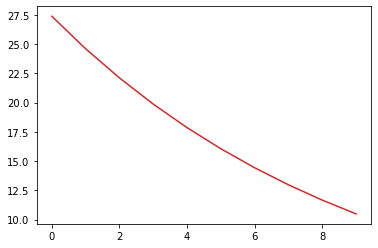

In [49]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

En este caso, el código del notebook era lo suficientemente general como para funcionar sin importar el número de features tomadas para predecir. Como esta es una regresión lineal, es notorio que con 10 épocas de entrenamiento no basta para llegar al mejor resultado por lo que intentaré entrenarlo hasta que la pérdida de entrenamiento se estanque.

In [54]:
w, b, loss_hist = train(x, y_true, steps = 75)
w, b

(tensor([[0.2525],
         [0.4749]]),
 tensor([0.0370]))

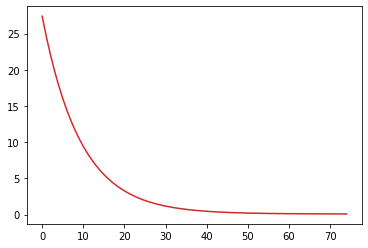

In [55]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

In [59]:
print(f"La última pérdida fue de: {loss_hist[-1].item()}")

La última pérdida fue de: 0.0999293401837349


Claramente ya el modelo llegó a un punto en el que no va a "aprender" más. Esto es por el alto sesgo implícito en el modelo (es lineal solamente). Parece ser que a pesar de tal vez un poco de error numérico , el error del óptimo es de aproximadamente 0.1.